<a href="https://colab.research.google.com/github/timothyosm/Learning-tensorFlow/blob/master/c2f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
temp_df = pd.read_csv('/content/drive/My Drive/cel2f.csv')

In [146]:
temp_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [147]:
temp_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [148]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [149]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


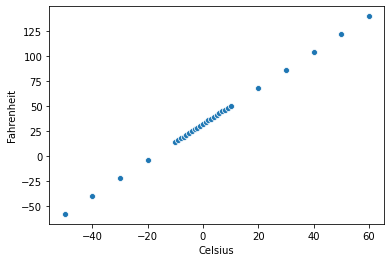

In [150]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])

In [0]:
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

In [152]:
x_train.shape

(30,)

In [153]:
y_train.shape

(30,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [155]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer= tf.keras.optimizers.Adam(0.5), loss = 'mean_squared_error')

In [157]:
epochs_hist = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 6285.5674
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 4742.6406
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 3464.0056
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 2450.5251
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 1697.1189
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 1190.3473
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 906.0216
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 807.6500
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 847.1862
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 969.3416
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 1119.2318
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 1250.9459
Epoch 13/500
1/1 [===========

In [158]:
epochs_hist.history.keys()

dict_keys(['loss'])

Text(0, 0.5, 'training')

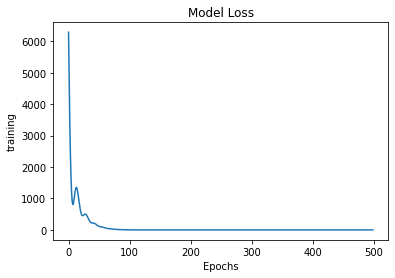

In [159]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('training')

In [160]:
model.get_weights()

[array([[1.7999998]], dtype=float32), array([32.000023], dtype=float32)]

In [164]:
temp_C = 8795
temp_F = model.predict([temp_C])
print('Temp in F ', temp_F)

Temp in F  [[15862.998]]
